## Introduction

In the digital age, laptops have become an indispensable tool for various aspects of life, from education to work and beyond. Understanding the intricate dynamics that influence laptop pricing is essential for both consumers and manufacturers. Our Laptop Price Dataset project serves as a gateway to deciphering this complex pricing puzzle.
See this dataset contains many informations likeCompany,Cpu,Gpu,OpSys and many more, Our overarching goal is to leverage cutting-edge machine learning algorithms to predict laptop prices with remarkable accuracy.
Imagine you want to buy a laptop. You just tell our model a few things about what you're looking for, like the brand, the kind of processor, the graphics card, and how much memory you need. Our model then tells you a price that's pretty close to what you'd find in the market.

This project holds immense value. Manufacturers can fine-tune their pricing strategies, optimize product offerings, and align them with market demand. Simultaneously, consumers can navigate the laptop market with confidence, making well-informed choices that suit their requirements and budgets. By bridging the gap between laptops' technical features and their market value, we aim to empower both businesses and end-users in the ever-evolving laptop industry.

In [1]:
#import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [12]:
# load the dataset
df=pd.read_csv('laptop_data.csv')

In [3]:
# see first 5 rows of the dataset
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
# see last 5 rows of the dataset
df.tail()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1298,1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.64
1299,1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.72
1300,1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.12
1301,1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.92
1302,1302,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,19660.32


In [5]:
# shape
df.shape

(1303, 12)

In this dataset contains 1303 observations and 12 columns.

In [6]:
# see statistical summary of the dataset
df.describe()

,Unnamed: 0,Inches,Price
count,1303.00000,1303.000000,1303.000000
mean,651.00000,15.017191,59870.042910
std,376.28801,1.426304,37243.201786
min,0.00000,10.100000,9270.720000
25%,325.50000,14.000000,31914.720000
50%,651.00000,15.600000,52054.560000
75%,976.50000,15.600000,79274.246400
max,1302.00000,18.400000,324954.720000


In [7]:
# see the information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In this dataset have 3 numerical column and 9 categorical column.

In [8]:
# see all the columns 
df.columns

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

In [9]:
# check the duplicate values 
df.duplicated().sum()

0

The dataset is free from duplicate values, ensuring that each data point within it is unique and distinct, without any repetitions.

In [13]:
# drop one unnecessary column 'Unnamed'
df.drop(columns=['Unnamed: 0'],inplace=True)

In [14]:
# check missing values
df.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

The dataset is complete, meaning it doesn't have any missing or empty values.

In [15]:
# remove some keywords like 'GB' from Ram column and 'Kg' from weight column.
df['Ram']=df['Ram'].str.replace('GB','')
df['Weight']=df['Weight'].str.replace('kg','')

In [16]:
# now convert these categorical column into numerical column
df['Ram']=df['Ram'].astype('int')
df['Weight']=df['Weight'].astype('float32')

first i remove categorical features from 'ram' and 'weight' these two columns, then convert the datatype from categorical column to numerical columns.

In [17]:
# see the datatypes of all columns
df.dtypes

Company              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                   int32
Memory               object
Gpu                  object
OpSys                object
Weight              float32
Price               float64
dtype: object

Now this dataset have 4 numerical columns and 7 categorical columns.

# Data Visualization

<Axes: xlabel='Price', ylabel='Density'>

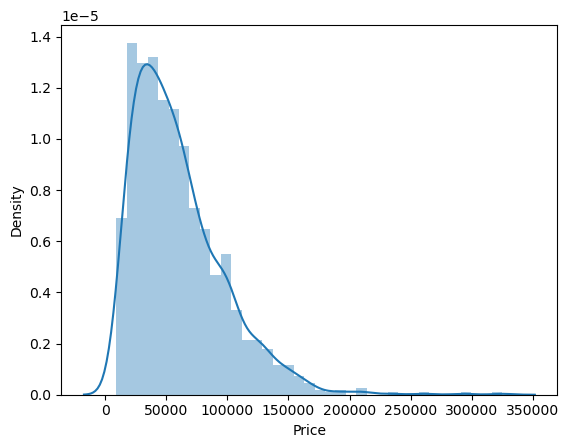

In [18]:
# see the distribution of price column
sns.distplot(df['Price'])

The majority of laptops fall within the price range of 30,000 to 80,000, indicating that this is the most common price range for laptops. There are relatively few laptops with prices exceeding 1 lakh (100,000). This distribution of prices suggests that the data in the 'Price' column is left-skewed, meaning that it is concentrated towards the lower end of the price scale, with fewer laptops being high-priced

<Axes: >

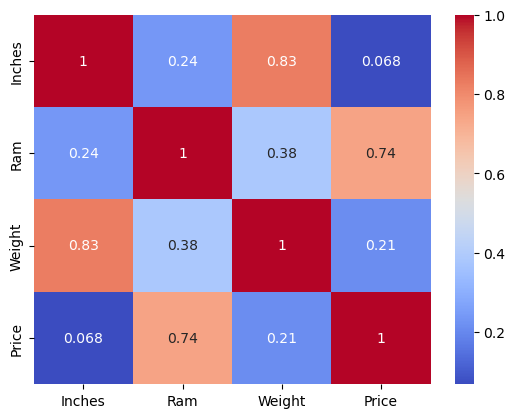

In [19]:
# see the co relation of numerical columns of the dataset
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

A heatmap is a visual representation that helps us understand how different columns in a dataset are related to each other.We observe a high correlation between the 'Weight' and 'Inches' columns, as well as between the 'Price' and 'Ram' columns. This means that as one of these values goes up or down, the other tends to do the same.

In [20]:
# count laptop's bassed on their company
df['Company'].value_counts()

Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Razer          7
Mediacom       7
Microsoft      6
Xiaomi         4
Vero           4
Chuwi          3
Google         3
Fujitsu        3
LG             3
Huawei         2
Name: Company, dtype: int64

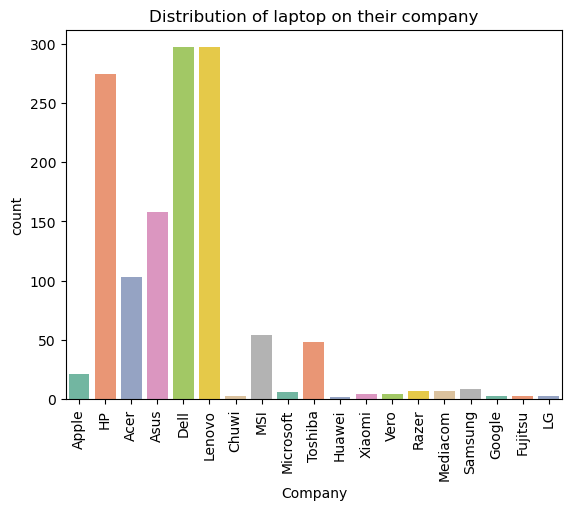

In [21]:
# plot a graph to count laptop bassed on their company
sns.countplot(x='Company',data=df,palette='Set2')
plt.xticks(rotation='vertical')
plt.title('Distribution of laptop on their company')
plt.show()

In the dataset, the majority of laptops are manufactured by Dell and Lenovo companies. Following them in terms of the number of laptops in the dataset are HP, Asus, and Acer. These brands have a significant presence in the dataset, indicating their popularity or prevalence among the laptops included for analysis

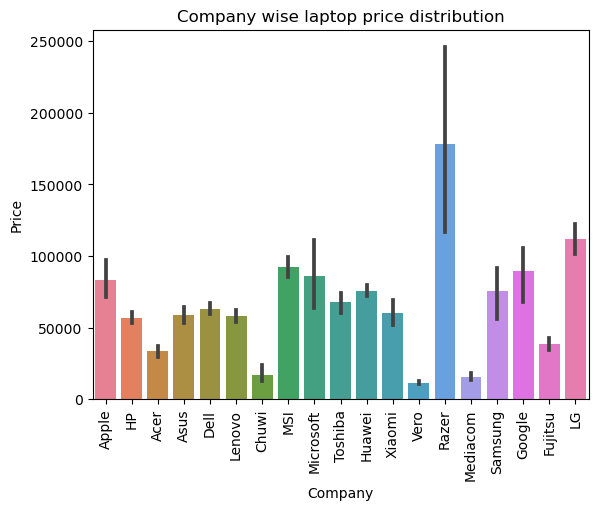

In [22]:
# create a bar plot to see the laptop price bassed on different company
sns.barplot(data=df,x='Company',y='Price',palette='husl')
plt.xticks(rotation=90)
plt.title('Company wise laptop price distribution')
plt.show()

Rezar Company is renowned for producing laptops that are among the most expensive in the market. Similarly, laptops offered by LG, Google, and MSI are also perceived as relatively pricey when compared to other brands. In contrast, HP, Asus, Dell, Lenovo, and Xiaomi offer laptops within a similar and more moderate price range. On the other hand, laptops from Chuwi, Vero, and Mediacom are known for being very budget-friendly and affordable in the market.

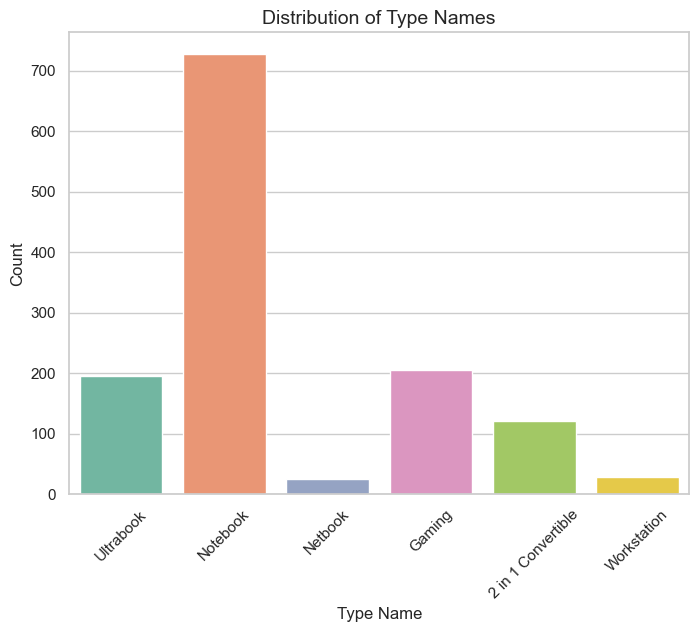

In [24]:
# see the different types of laptop distribution
# Adjust the figure size
plt.figure(figsize=(8,6))
sns.set(style='whitegrid')

sns.countplot(x='TypeName',data=df,palette='Set2')

# Rotate x-axis labels vertically for better readability
plt.xticks(rotation=45)

# Set proper axis labels and title
plt.xlabel('Type Name', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Type Names', fontsize=14)
plt.show()

Among various laptop types, the most common category is 'Notebook,' which includes laptops designed for general-purpose use. Following Notebook laptops, we have 'Gaming' laptops, which are optimized for gaming performance, and 'Ultrabook' laptops known for their slim and lightweight design. On the other hand, 'Netbook' and 'Workstation' laptops represent relatively less common types, with specialized purposes and features.

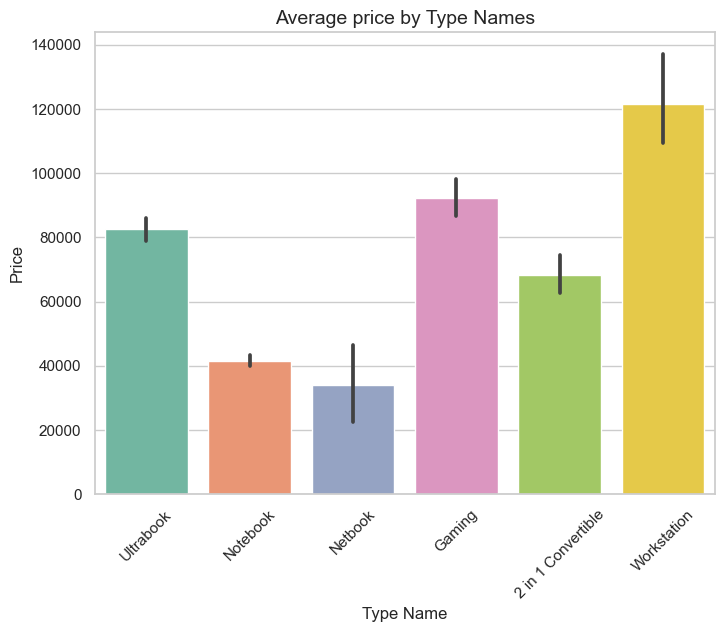

In [23]:
# create a plot to see the average price bassed different laptop types
# Adjust the figure size
plt.figure(figsize=(8,6))
sns.set(style='whitegrid')

# Create the countplot
sns.barplot(x='TypeName',y='Price',data=df,palette='Set2')

# Rotate x-axis labels vertically for better readability
plt.xticks(rotation=45)

# Set proper axis labels and title
plt.xlabel('Type Name', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.title('Average price by Type Names', fontsize=14)
plt.show()

The cost hierarchy for laptops is as follows: Workstation laptops have the highest price, followed by gaming laptops, and then Ultrabook-type laptops.Notebook and Netbook Laptops are generally the most budget-friendly options among all laptop types.

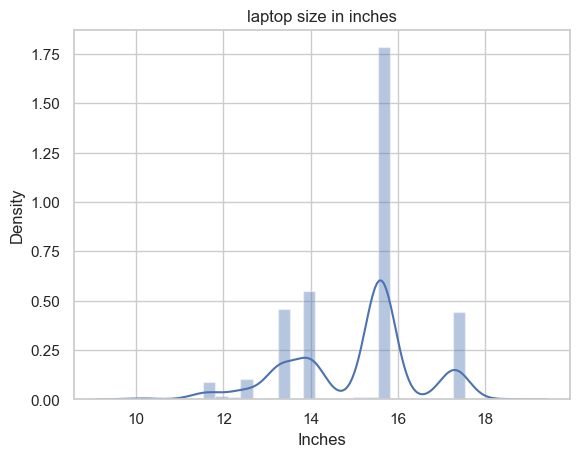

In [25]:
# create a plot to see the distribution of laptop size in inches
sns.distplot(df['Inches'])
plt.title('laptop size in inches')
plt.show()

Laptop screens are commonly available in various sizes, with larger screens being the most prevalent, typically exceeding 15 inches. Following that, 14-inch screens are also quite common, and 13-inch screens are the smallest among the standard sizes.

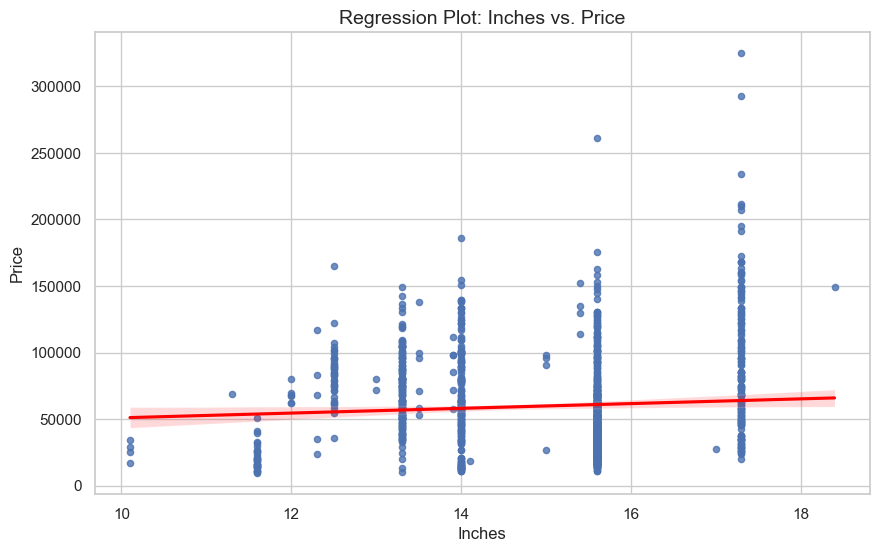

In [26]:
# Adjust the figure size 
plt.figure(figsize=(10, 6))  
sns.set(style="whitegrid")   

# Create a regression plot with a regression line
sns.regplot(x='Inches', y='Price', data=df, scatter_kws={'s': 20}, line_kws={'color': 'red'})

# Set proper axis labels and title
plt.xlabel('Inches', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.title('Regression Plot: Inches vs. Price', fontsize=14)
plt.show()

The connection between the size of a laptop screen (measured in inches) and its price is not very strong. In other words, as the screen size gets larger, the price typically doesn't increase dramatically, instead, it tends to go up slowly.

In [27]:
df['ScreenResolution'].value_counts()

Full HD 1920x1080                                507
1366x768                                         281
IPS Panel Full HD 1920x1080                      230
IPS Panel Full HD / Touchscreen 1920x1080         53
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440               

In [28]:
# find which laptop's have IPS feature and create one new column named IPS(1 for IPS, 0 for non-IPS)
df['IPS']=df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

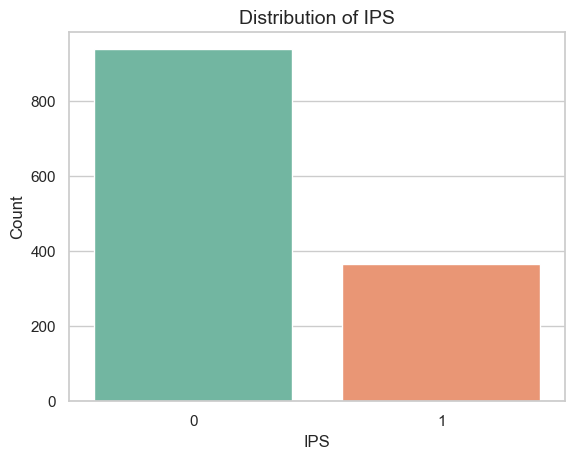

In [29]:
# Create the countplot
sns.countplot(x='IPS',data=df,palette='Set2')

# Set proper axis labels and title
plt.xlabel('IPS', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of IPS', fontsize=14)
plt.show()

Many laptops do not incorporate IPS displays as a standard feature.

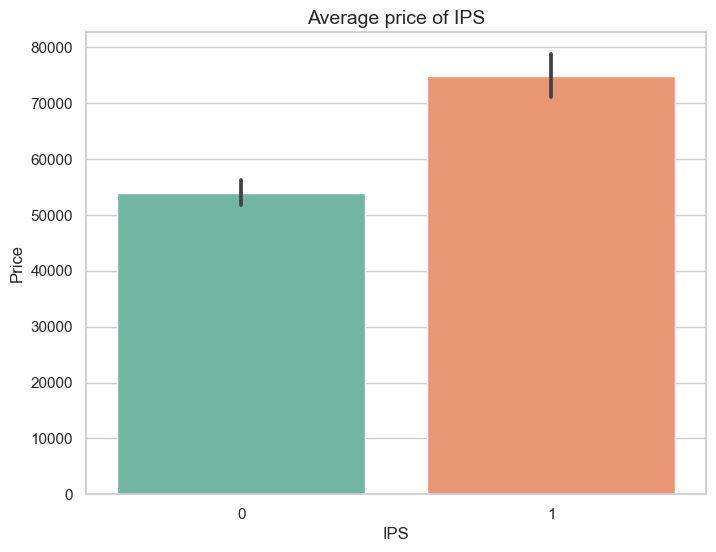

In [30]:
# Adjust the figure size
plt.figure(figsize=(8,6))
sns.set(style='whitegrid')

# Create the barplot to see the price for IPS and non-IPS
sns.barplot(x='IPS',y='Price',data=df,palette='Set2')

# Set proper axis labels and title
plt.xlabel('IPS', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.title('Average price of IPS', fontsize=14)
plt.show()

Laptops equipped with IPS displays typically come at a higher price point compared to those with non-IPS screens. This is because IPS is considered an advanced feature, and advanced features often command a premium price.It improved visual quality and performance, which can be valuable for tasks that demand high-quality visuals and enhanced productivity.

In [31]:
# find which laptops have feature of Touchscreen and create a new column as Touchscreen (1 for Tochscreen, 0 for not a touchscreen)
df['Touchscreen']=df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

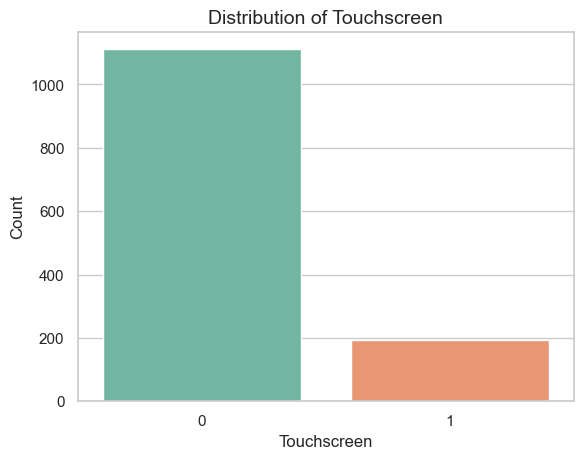

In [32]:
# Create the countplot to see the distribution of touchscreen
sns.countplot(x='Touchscreen',data=df,palette='Set2')

# Set proper axis labels and title
plt.xlabel('Touchscreen', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Touchscreen', fontsize=14)
plt.show()

A small proportion of laptops in the dataset have a touchscreen feature. Specifically, fewer than 20% of the laptops possess this capability, indicating that touchscreen laptops are relatively uncommon in this dataset.

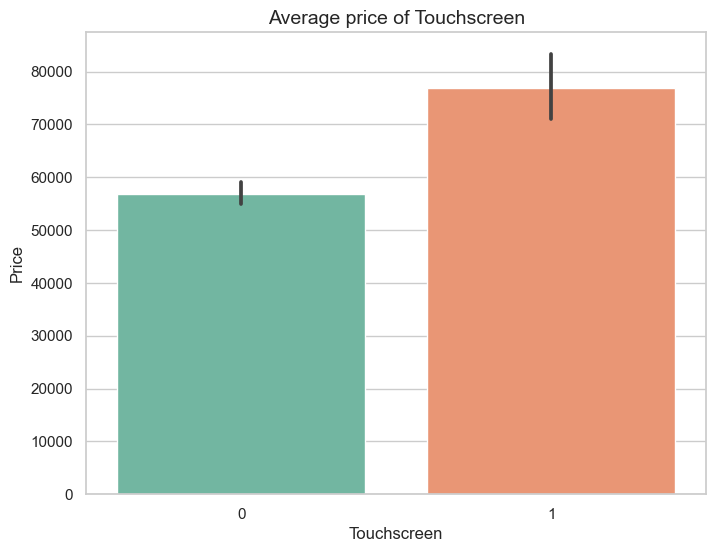

In [33]:
# Adjust the figure size
plt.figure(figsize=(8,6))
sns.set(style='whitegrid')

# Create the countplot
sns.barplot(x='Touchscreen',y='Price',data=df,palette='Set2')

# Set proper axis labels and title
plt.xlabel('Touchscreen', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.title('Average price of Touchscreen', fontsize=14)
plt.show()

Laptops equipped with touchscreen functionality typically come at a higher price point compared to their non-touchscreen counterparts.This premium cost shows added value and enhanced user experience that touchscreens offer, making them an attractive choice for consumers seeking advanced features and modern usability

In [34]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,IPS,Touchscreen
391,Asus,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,3.00,84768.48,0,0
365,HP,Notebook,15.6,1366x768,Intel Pentium Quad Core N3710 1.6GHz,8,2TB HDD,Intel HD Graphics 405,Windows 10,2.04,20725.92,0,0
90,Asus,Gaming,15.6,Full HD 1920x1080,AMD FX 9830P 3GHz,8,1TB HDD,AMD Radeon RX 560,Windows 10,2.45,37242.72,0,0
264,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,1TB HDD,AMD Radeon R5 M430,Windows 10,2.24,30103.20,0,0
806,Toshiba,Notebook,15.6,1366x768,Intel Core i5 6200U 2.3GHz,4,500GB HDD,Intel HD Graphics 520,Windows 10,2.10,41558.40,0,0


In [35]:
# extract laptop screen width and height from screenresolution column
df['Resolution_Width'] = df['ScreenResolution'].str.extract(r'(\d+)x\d+').astype(int)
df['Resolution_Height'] = df['ScreenResolution'].str.extract(r'\d+x(\d+)').astype(int)

In [36]:
# see the corelation of all column with price column
df.corr()['Price']

Inches               0.068197
Ram                  0.743007
Weight               0.210370
Price                1.000000
IPS                  0.252208
Touchscreen          0.191226
Resolution_Width     0.556529
Resolution_Height    0.552809
Name: Price, dtype: float64

In [37]:
# calculate PPI(Pixels Per Inch) and create a new column named PPI
df['PPI'] = (((df['Resolution_Width']**2) + (df['Resolution_Height']**2))**0.5/df['Inches']).astype('float')

In [38]:
# drop these three columns 'ScreenResolution','Resolution_Width' and 'Resolution_Height'
df.drop(columns=['ScreenResolution'],inplace=True)
df.drop(columns=['Resolution_Width','Resolution_Height'],inplace=True)

I removed these three columns because our analysis of PPI (Pixels Per Inch) already provides the necessary information about laptop screens.

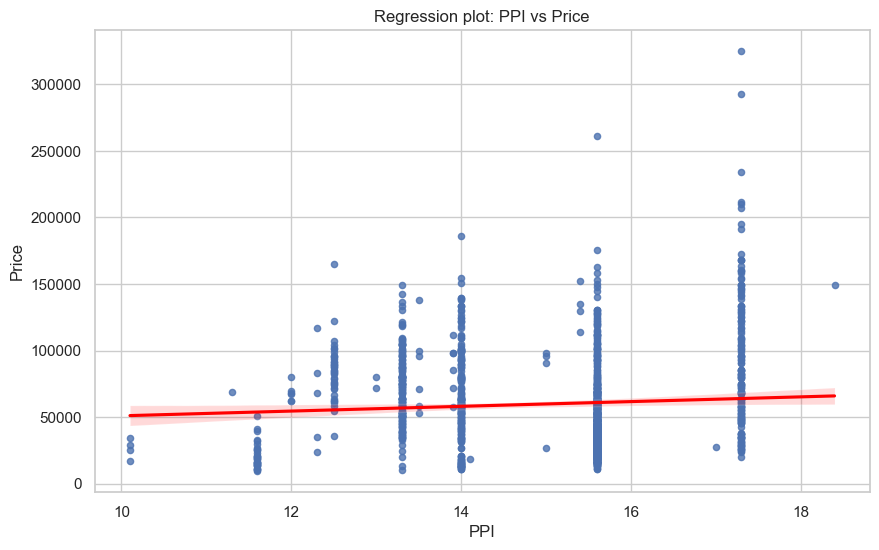

In [39]:
# Adjust the figure size 
plt.figure(figsize=(10, 6))  
sns.set(style="whitegrid")   

# Create a regression plot with a regression line
sns.regplot(x='Inches', y='Price', data=df, scatter_kws={'s': 20}, line_kws={'color': 'red'})
plt.xlabel('PPI')
plt.ylabel('Price')
plt.title('Regression plot: PPI vs Price')
plt.show()

The connection between PPI (Pixels Per Inch) and its price is not very strong. In other words, as the screen Pixels gets higher, the price typically doesn't increase dramatically, instead, it tends to go up slowly.

In [40]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,IPS,Touchscreen,PPI
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,1,0,226.983005
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,1,0,220.534624
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,1,0,226.983005


In [41]:
# count the unique value in the Cpu column 
df['Cpu'].value_counts()

Intel Core i5 7200U 2.5GHz       190
Intel Core i7 7700HQ 2.8GHz      146
Intel Core i7 7500U 2.7GHz       134
Intel Core i7 8550U 1.8GHz        73
Intel Core i5 8250U 1.6GHz        72
                                ... 
Intel Core M M3-6Y30 0.9GHz        1
AMD A9-Series 9420 2.9GHz          1
Intel Core i3 6006U 2.2GHz         1
AMD A6-Series 7310 2GHz            1
Intel Xeon E3-1535M v6 3.1GHz      1
Name: Cpu, Length: 118, dtype: int64

count and display the frequency of each unique value in the 'Cpu' column

In [42]:
# create one new column 'Cpu Name' by first three words shows Cpu name using by laptop
df['Cpu Name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [43]:
# create one function which only extract Cpu brand name
def processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [44]:
# Create a new column cpu brand from cpu name column by extracting brand name
df['Cpu brand'] = df['Cpu Name'].apply(processor)

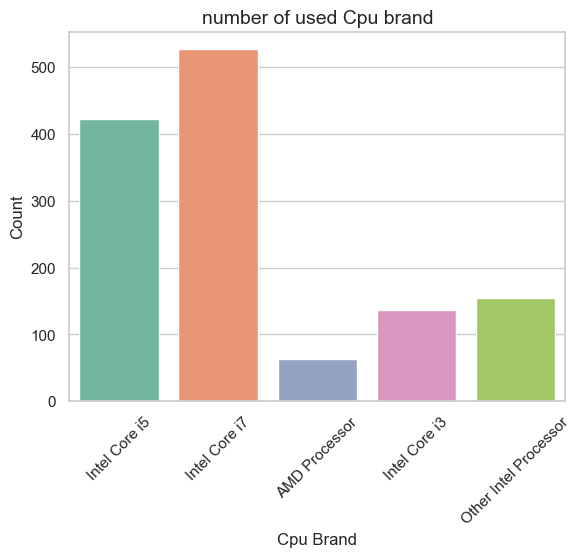

In [45]:
# Create a plot to see which Processor are using most 
sns.countplot(x='Cpu brand',data=df,palette='Set2')

plt.xticks(rotation=45)
plt.xlabel('Cpu Brand', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('number of used Cpu brand', fontsize=14)
plt.show()

The majority of devices are equipped with 'Intel Core i7' and 'Intel Core i5' processors, with 'Intel Core i7' being one of the latest and most advanced options. On the other hand, there's relatively low usage of AMD processors.particularly the Core i7 and Core i5 series, are more commonly chosen by consumers and businesses for their computing needs.

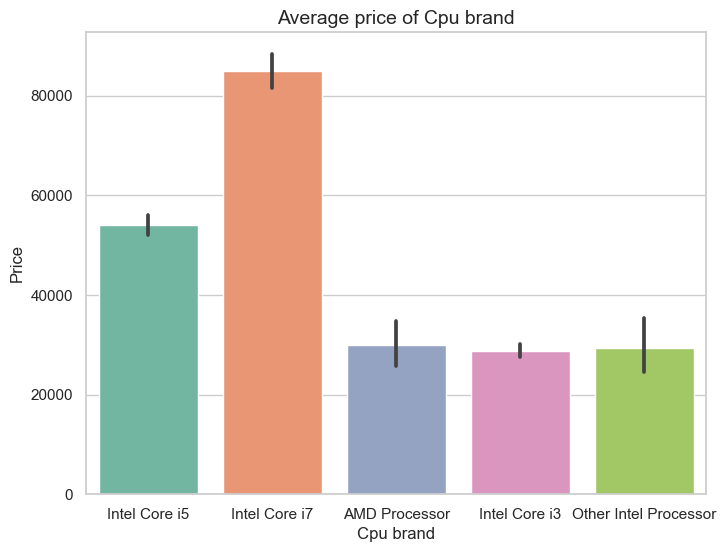

In [46]:
# Adjust the figure size
plt.figure(figsize=(8,6))
sns.set(style='whitegrid')

# Create a barplot to see the average price of Cpu brands
sns.barplot(x='Cpu brand',y='Price',data=df,palette='Set2')

# Set proper axis labels and title
plt.xlabel('Cpu brand', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.title('Average price of Cpu brand', fontsize=14)
plt.show()

The Intel Core i7 processor commands a higher price compared to other processors, with the Intel Core i5 processor following closely as the second most expensive option. However, for most other processors, their prices fall within a similar and more affordable range.

In [47]:
# drop these two unnecessary columns 'Cpu' and 'Cpu Name'
df.drop(columns=['Cpu','Cpu Name'],inplace=True)

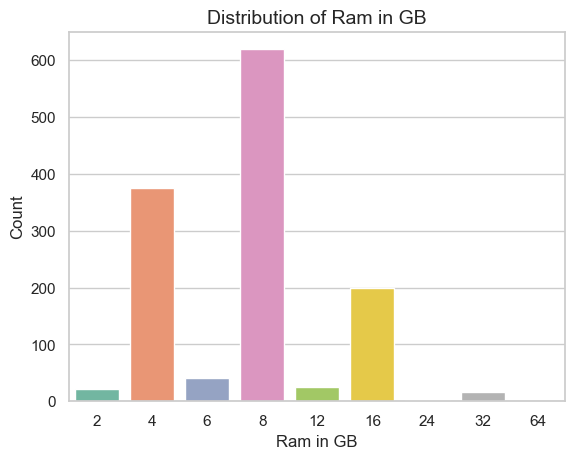

In [48]:
# Create a plot to see the Ram size using by laptop
sns.countplot(x='Ram',data=df,palette='Set2')

# Set proper axis labels and title
plt.xlabel('Ram in GB', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Ram in GB', fontsize=14)
plt.show()

The most commonly used capacity is 8 GB, followed by 4 GB and 16 GB. This trend is important for businesses to understand, as it indicates a strong market preference for laptops with 8 GB of RAM, which should be considered when designing and offering products or services in the laptop industry.

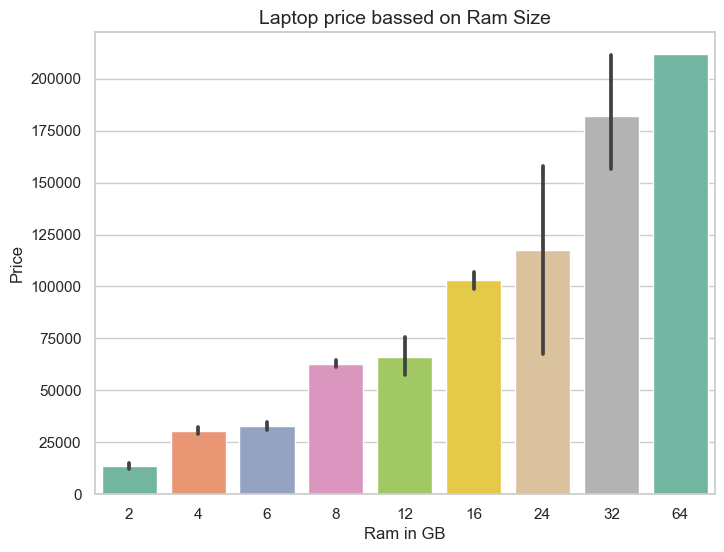

In [49]:
# Adjust the figure size
plt.figure(figsize=(8,6))
sns.set(style='whitegrid')

# Create a barplot to see laptop price bassed on Ram size
sns.barplot(x='Ram',y='Price',data=df,palette='Set2')

# Set proper axis labels and title
plt.xlabel('Ram in GB', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.title('Laptop price bassed on Ram Size', fontsize=14)
plt.show()

See their is a linear relationship between Ram size and laptop price,  the RAM size increases, the price of the laptop also tends to rise. This means that if you want a laptop with more memory to handle demanding tasks, it's likely to come at a higher cost.

In [50]:
# count the unique values in the memory column
df['Memory'].value_counts()

256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
512GB SSD +  1TB HDD              14
1TB SSD                           14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD             1
5

In [51]:
# remove '.0' from any column value
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
# GB in each value is replace with empty 
df["Memory"] = df["Memory"].str.replace('GB', '')
# convert terabytes (TB) to gigabytes (GB) by multiplying by 1000
df["Memory"] = df["Memory"].str.replace('TB', '000')
# split each value at the '+' character
new = df["Memory"].str.split("+", n = 1, expand = True)
df["first"]= new[0]
df["first"]=df["first"].str.strip()

df["second"]= new[1]


In [52]:
df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

In [53]:
df['first'] = df['first'].str.replace(r'\D', '')

df["second"].fillna("0", inplace = True)

In [54]:
df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

In [55]:
df['second'] = df['second'].str.replace(r'\D', '')

df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

In [56]:
# drop the memory column
df.drop(columns=['Memory'],inplace=True)

In [57]:
df.head()

,Company,TypeName,Inches,Ram,Gpu,OpSys,Weight,Price,IPS,Touchscreen,PPI,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,1,0,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,13.3,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,15.6,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,15.4,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,1,0,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,13.3,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,1,0,226.983005,Intel Core i5,0,256,0,0


In [58]:
# see the corelation of every column bassed on price
df.corr()['Price']

Inches           0.068197
Ram              0.743007
Weight           0.210370
Price            1.000000
IPS              0.252208
Touchscreen      0.191226
PPI              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64

see here Hybrid column,Flash Storage column and Inches columns are very less or negative corelation with price column so we can drop these columns.

In [59]:
# drop these three columns
df.drop(columns=['Hybrid','Flash_Storage','Inches'],inplace=True)

In [60]:
# count the unique values in GPU column
df['Gpu'].value_counts()

Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: Gpu, Length: 110, dtype: int64

In [61]:
# split Gpu column only extract Gpu brand name from all values and create one new column Gpu barnd.
df['Gpu brand'] = df['Gpu'].apply(lambda x:x.split()[0])

In [62]:
# count the unique Gpu brand name
df['Gpu brand'].value_counts()

Intel     722
Nvidia    400
AMD       180
ARM         1
Name: Gpu brand, dtype: int64

In this dataset, there is only one entry for a GPU from the ARM brand. This suggests that ARM GPUs are exceptionally rare in this context.So we need to remove this value because it doesn't provide meaningful representation for analysis or insights within the dataset

In [63]:
# see only those value where Gpu brand is ARM
df[df['Gpu brand'] == 'ARM']

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,IPS,Touchscreen,PPI,Cpu brand,HDD,SSD,Gpu brand
1191,Samsung,2 in 1 Convertible,4,ARM Mali T860 MP4,Chrome OS,1.15,35111.52,1,1,234.5074,AMD Processor,0,0,ARM


In [64]:
# drop this row where Gpu brand is ARM
index_to_drop=1191
df.drop(index_to_drop,inplace=True)

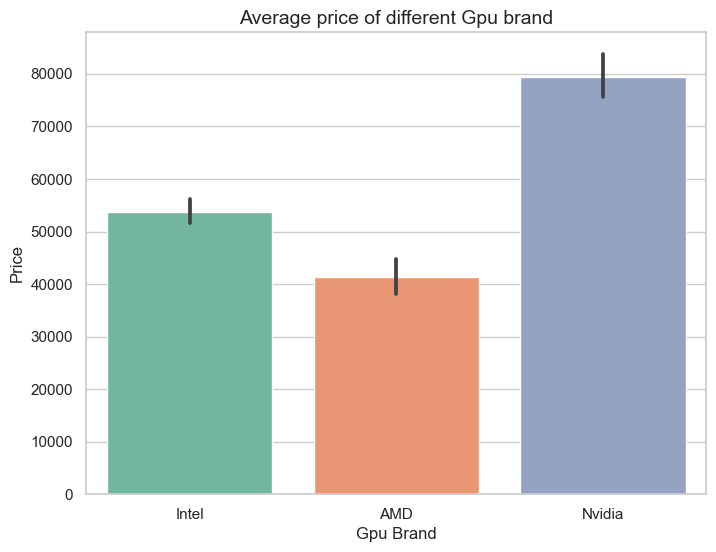

In [65]:
# Adjust the figure size
plt.figure(figsize=(8,6))
sns.set(style='whitegrid')

# Create a barplot to see average price bassed on different Gpu brand
sns.barplot(x='Gpu brand',y='Price',data=df,palette='Set2')

# Set proper axis labels and title
plt.xlabel('Gpu Brand', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.title('Average price of different Gpu brand', fontsize=14)
plt.show()

It's important to note that Nvidia's GPUs tend to have the highest prices, followed by Intel and AMD.

In [66]:
# drop Gpu column
df.drop(columns='Gpu',inplace=True)

In [67]:
# Count the unique values of different operating systems
df['OpSys'].value_counts()

Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: OpSys, dtype: int64

In [68]:
# create a function to categorized different operating system
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [69]:
# create a new column Os bassed on operating system
df['Os']=df['OpSys'].apply(cat_os)

In [70]:
# drop OpSys column
df.drop(['OpSys'],axis=1,inplace=True)

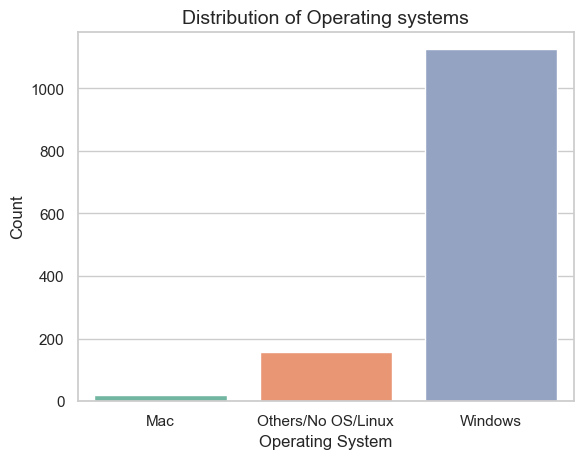

In [71]:
# Create a plot to see the Ram size using by laptop
sns.countplot(x='Os',data=df,palette='Set2')

# Set proper axis labels and title
plt.xlabel('Operating System', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Distribution of Operating systems', fontsize=14)
plt.show()

In the laptop market, Windows is the dominant operating system, with the majority of laptops running on it. Less than 20% of laptops are equipped with alternative operating systems. Mac, primarily used by Apple laptops, holds a relatively small share in the market

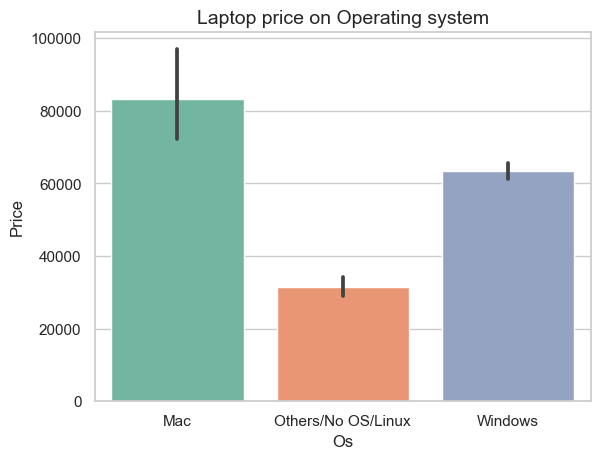

In [72]:
# Create a barplot to see average price bassed on Operating System
sns.barplot(x='Os',y='Price',data=df,palette='Set2')

# Set proper axis labels and title
plt.xlabel('Os', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.title('Laptop price on Operating system', fontsize=14)
plt.show()

Mac operating system laptops tend to have the highest prices, followed by Windows laptops, and then other brands

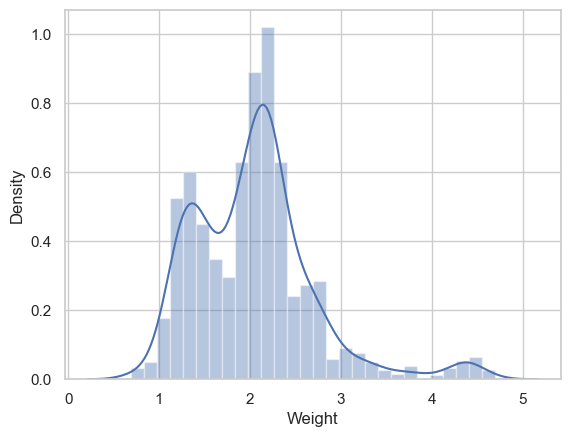

In [73]:
# see the distribution of weight 
sns.distplot(df['Weight'])
plt.show()

Mostly laptop price lies between 1.8kg to 2.4kg.

<Axes: >

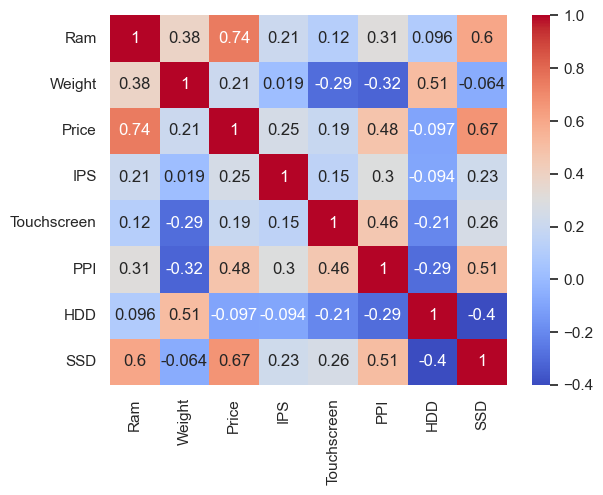

In [74]:
# create a heatmap to see the corelation of different columns
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

we've found strong correlations in the data. Specifically, the price of laptops is highly corelated with amount of RAM (memory) they have, as well as whether they feature SSD storage. Additionally, we've noticed that the weight of a laptop is linked to whether it has HDD storage.

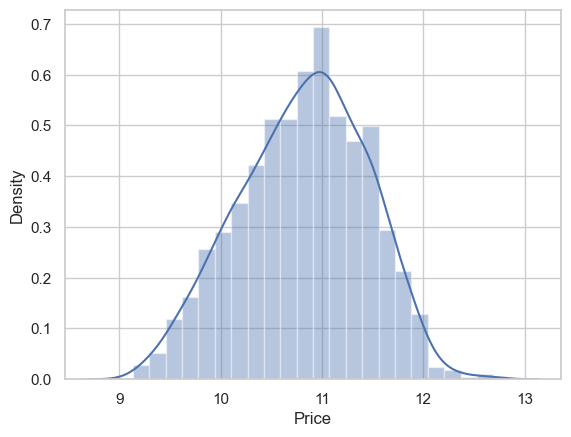

In [75]:
# see the distribution after using log in price column
sns.distplot(np.log(df['Price']))
plt.show()

By using log value the price is normally distributed.

In [76]:
df.head()

,Company,TypeName,Ram,Weight,Price,IPS,Touchscreen,PPI,Cpu brand,HDD,SSD,Gpu brand,Os
0,Apple,Ultrabook,8,1.37,71378.6832,1,0,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,1,0,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,1,0,226.983005,Intel Core i5,0,256,Intel,Mac


In [77]:
df.columns

Index(['Company', 'TypeName', 'Ram', 'Weight', 'Price', 'IPS', 'Touchscreen',
       'PPI', 'Cpu brand', 'HDD', 'SSD', 'Gpu brand', 'Os'],
      dtype='object')

In [79]:
df.to_csv('Laptop.csv',index=True)

## Input data

In [114]:
# extract dependent and independent column
X = df.drop(columns=['Price'])
y = np.log(df['Price'])

In [115]:
# Independent variable
X

,Company,TypeName,Ram,Weight,IPS,Touchscreen,PPI,Cpu brand,HDD,SSD,Gpu brand,Os
0,Apple,Ultrabook,8,1.37,1,0,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,1,0,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,1,0,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


### Convert categorical variable into numerical variable by dummie encoding

In [124]:
# Select the categorical columns to one-hot encode
categorical_columns = ["Company", "TypeName", "Cpu brand", "Gpu brand", "Os"]

# Select the numerical columns to keep as they are
numerical_columns = X.columns.difference(categorical_columns)

# Apply one-hot encoding to the categorical columns
df_encoded = pd.get_dummies(X, columns=categorical_columns)

# Concatenate the one-hot encoded columns with the numerical columns
X = pd.concat([df_encoded, X[numerical_columns]], axis=1)


In [125]:
# see our input data
X

,Ram,Weight,IPS,Touchscreen,PPI,HDD,SSD,Company_Acer,Company_Apple,Company_Asus,...,Os_Mac,Os_Others/No OS/Linux,Os_Windows,HDD,IPS,PPI,Ram,SSD,Touchscreen,Weight
0,8,1.37,1,0,226.983005,0,128,0,1,0,...,1,0,0,0,1,226.983005,8,128,0,1.37
1,8,1.34,0,0,127.677940,0,0,0,1,0,...,1,0,0,0,0,127.677940,8,0,0,1.34
2,8,1.86,0,0,141.211998,0,256,0,0,0,...,0,1,0,0,0,141.211998,8,256,0,1.86
3,16,1.83,1,0,220.534624,0,512,0,1,0,...,1,0,0,0,1,220.534624,16,512,0,1.83
4,8,1.37,1,0,226.983005,0,256,0,1,0,...,1,0,0,0,1,226.983005,8,256,0,1.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,4,1.80,1,1,157.350512,0,128,0,0,0,...,0,0,1,0,1,157.350512,4,128,1,1.80
1299,16,1.30,1,1,276.053530,0,512,0,0,0,...,0,0,1,0,1,276.053530,16,512,1,1.30
1300,2,1.50,0,0,111.935204,0,0,0,0,0,...,0,0,1,0,0,111.935204,2,0,0,1.50
1301,6,2.19,0,0,100.454670,1000,0,0,0,0,...,0,0,1,1000,0,100.454670,6,0,0,2.19


In [80]:
# splitting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

here i devide my dataset where 80% for training data and 20% data for testing data.

# Frature Scaling

In [81]:
# performing transformation of data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train=sc.fit_transform(X_train)
X_train

array([[-0.0846943 , -0.18105226, -0.62141113, ...,  0.3784007 ,
        -0.41826256, -0.18105226],
       [-0.0846943 , -1.16646102, -0.62141113, ...,  0.3784007 ,
        -0.41826256, -1.16646102],
       [-0.0846943 , -1.12098066, -0.62141113, ...,  0.3784007 ,
        -0.41826256, -1.12098066],
       ...,
       [-0.0846943 ,  0.25859178, -0.62141113, ..., -0.98455373,
        -0.41826256,  0.25859178],
       [-0.0846943 ,  0.04634973, -0.62141113, ...,  0.3784007 ,
         2.39084275,  0.04634973],
       [-0.0846943 ,  0.71339577,  1.60924056, ..., -0.98455373,
        -0.41826256,  0.71339577]])

In [82]:
X_test=sc.transform(X_test)
X_test

array([[-0.89356371,  0.25859178, -0.62141113, ..., -0.98455373,
        -0.41826256,  0.25859178],
       [-0.89356371,  0.01602949, -0.62141113, ...,  0.3784007 ,
        -0.41826256,  0.01602949],
       [-0.0846943 ,  0.97111819, -0.62141113, ...,  1.74135512,
        -0.41826256,  0.97111819],
       ...,
       [-0.89356371,  0.30407215, -0.62141113, ...,  0.3784007 ,
        -0.41826256,  0.30407215],
       [-0.89356371, -0.04461099, -0.62141113, ..., -0.98455373,
        -0.41826256, -0.04461099],
       [-0.0846943 , -0.99969951,  1.60924056, ...,  1.74135512,
         2.39084275, -0.99969951]])

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [84]:
# importing cost function libraries
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## Linear Regression

In [83]:
# fitting linear regression model
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [85]:
y_pred_lm = lm.predict(X_test) # predicting test set

In [86]:
# calculating error
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_lm))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_lm))

MAE: 0.20915468190712858
MSE: 0.07333962524000581


In [87]:
r2_lm = r2_score(y_test,y_pred_lm)
print(r2_lm)

0.8218640750928816


## Decision Tree

In [89]:
# Create a Decision Tree Regressor model
dt_regressor = DecisionTreeRegressor(random_state=0)
dt_regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [90]:
# Now, you can use the trained model to make predictions
y_pred_dt = dt_regressor.predict(X_test) 

In [91]:
r2_dt=r2_score(y_test,y_pred_dt)
print(r2_dt)

0.7652968866158285


In [92]:
# calculating error
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_dt))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_dt))

MAE: 0.23156232628532297
MSE: 0.09662867491345585


### Random Forest

In [94]:
# Create a Random Forest Regressor model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)  
rf_regressor.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [95]:
# Now, you can use the trained model to make predictions
y_pred_rf = rf_regressor.predict(X_test) 

In [96]:
r2_rf=r2_score(y_test,y_pred_rf)
print(r2_rf)

0.8684555651569131


In [97]:
# calculating error
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_rf))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_rf))

MAE: 0.17291744495990855
MSE: 0.05415763024123631


### Gradient Boosting

In [99]:
# create gradient boosting regressor model
gbr = GradientBoostingRegressor(n_estimators=500)
gbr.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=500)

In [100]:
y_pred_gbr = gbr.predict(X_test) 

In [101]:
r2_gbr=r2_score(y_test,y_pred_gbr)
print(r2_gbr)

0.8641092192507812


In [102]:
# calculating error
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_gbr))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_gbr))

MAE: 0.16490030036748732
MSE: 0.05594704683469071


### Xg Boosting

In [118]:
# create a xg boosting regressor model
xgb=XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5,)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.5, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=45, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [119]:
y_pred_xgb = xgb.predict(X_test) 

In [120]:
r2_xgb=r2_score(y_test,y_pred_xgb)
print(r2_xgb)

0.8679530447020045


In [121]:
# calculating error
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_xgb))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_xgb))

MAE: 0.16901043754993647
MSE: 0.05436452091675643


## Conclusion
In this Laptop Price dataset project, we embarked on a journey to extract valuable insights that can drive business decisions in the fiercely competitive laptop market.Our analysis led us to the utilization of the Random Forest regression model, which proved to be a robust performer. It delivered an impressive 86% R-squared (R2) score, signifying the model's ability to explain variations in laptop prices. Additionally, we achieved remarkably low Mean Squared Error (MSE), indicative of the model's predictive accuracy.

Beyond Random Forest, other models like Gradient Boosting and XGBoost also displayed strong predictive capabilities, offering viable alternatives.

This project equips decision-makers with data-driven insights to navigate pricing strategies and product positioning in the competitive laptop market. The success of the Random Forest model underscores its suitability for optimizing pricing and enhancing profitability. Through this project, we have taken a significant step toward solving real-world business challenges in the laptop industry.